In [1]:
import numpy as np

class ScratchLogisticRegression:
    
    def __init__(self, num_iter=1000, lr=0.01, bias=True, verbose=False):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def _linear_hypothesis(self, X):
        return np.dot(X, self.coef_.T)
        
    def fit(self, X, y):
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        self.coef_ = np.random.rand(1, X.shape[1])
        
        for i in range(self.num_iter):
            z = self._linear_hypothesis(X)
            h = self._sigmoid(z)
            error = h - y.reshape(-1, 1)
            grad = np.dot(X.T, error) / len(X)
            self.coef_ -= self.lr * grad.T
            
            if self.verbose and i % 100 == 0:
                loss = self._cost(X, y)
                print(f"Iteration {i}: Loss={loss}")
            
    def predict(self, X):
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        proba = self._sigmoid(self._linear_hypothesis(X))
        return np.where(proba >= 0.5, 1, 0)
    
    def predict_proba(self, X):
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        return self._sigmoid(self._linear_hypothesis(X))
    
    def _cost(self, X, y):
        z = self._linear_hypothesis(X)
        h = self._sigmoid(z)
        cost = -y.reshape(-1, 1) * np.log(h) - (1 - y.reshape(-1, 1)) * np.log(1 - h)
        return np.mean(cost)


In [3]:
class ScratchLogisticRegression:
    """
    Logistic regression using scratch
    Parameters
    ----------
    num_iter : int
        Number of iterations for updating weights.
    lr : float
        Learning rate.
    bias : bool
        Whether to include bias term or not.
    verbose : bool
        Whether to output logs or not.
    lmd : float
        Regularization parameter.
    """
    def __init__(self, num_iter=1000, lr=0.01, bias=True, verbose=True, lmd=0.1):
        # initialize hyperparameters
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lmd = lmd

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _add_bias(self, X):
        return np.insert(X, 0, 1, axis=1)

    def _gradient_descent(self, X, y):
        # update parameters by gradient descent
        m, n = X.shape
        h = self._sigmoid(np.dot(X, self.theta))
        errors = h - y

        self.theta[0] -= (self.lr / m) * np.dot(errors, X[:, 0])
        self.theta[1:] -= (self.lr / m) * (np.dot(errors, X[:, 1:]) + self.lmd * self.theta[1:])

    def fit(self, X, y):
        """
        Learn logistic regression model using steepest descent
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data
        y : ndarray, shape (n_samples,)
            Correct label of training data
        """
        if self.bias:
            X = self._add_bias(X)

        m, n = X.shape

        # initialize parameters
        self.theta = np.zeros(n)

        # update parameters iteratively
        for i in range(self.num_iter):
            self._gradient_descent(X, y)

            if self.verbose and i % 100 == 0:
                loss = self._cost(X, y)
                print(f"Iteration {i}: Loss={loss:.4f}")

    def _cost(self, X, y):
        m = X.shape[0]
        h = self._sigmoid(np.dot(X, self.theta))
        J = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h))) + (self.lmd/(2*m)) * np.sum(self.theta[1:]**2)
        return J

    def predict(self, X):
        """
        Predict class labels for samples in X.
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Samples.
        Returns
        -------
        y_pred : ndarray, shape (n_samples,)
            Predicted class labels.
        """
        if self.bias:
            X = self._add_bias(X)

        pred_proba = self._sigmoid(np.dot(X, self.theta))
        return np.where(pred_proba > 0.5, 1, 0)

    def predict_proba(self, X):
        """
        Probability estimates.
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Samples.
        Returns
        -------
        proba : ndarray, shape (n_samples,)
            Probability of the sample for each class in the model.
        """
        if self.bias:
            X


In [4]:
def _gradient_descent(self, X, y):
    m = X.shape[0]
    h = self._sigmoid(np.dot(X, self.coef_))
    grad = np.dot(X.T, (h - y)) / m
    self.coef_[0] -= self.lr * grad[0]
    self.coef_[1:] -= self.lr * (grad[1:] + self.alpha / m * self.coef_[1:])


In [5]:
class ScratchLogisticRegression():
    def __init__(self, num_iter, lr, bias=True, verbose=False, lmbd=0.1):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lmbd = lmbd
        
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def _gradient_descent(self, X, y):
        m = len(X)
        h = self._sigmoid(np.dot(X, self.theta))
        grad = (1/m) * np.dot(X.T, (h - y))
        grad[1:] = grad[1:] + (self.lmbd / m) * self.theta[1:]
        self.theta -= self.lr * grad
        
    def fit(self, X, y):
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
            
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            self._gradient_descent(X, y)
            
            if self.verbose and i % 100 == 0:
                cost = self._cost_function(X, y)
                print(f"iter: {i}, cost: {cost}")
                
    def _cost_function(self, X, y):
        m = len(X)
        h = self._sigmoid(np.dot(X, self.theta))
        reg = (self.lmbd / (2 * m)) * np.sum(self.theta[1:]**2)
        cost = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h))) + reg
        return cost
    
    def predict_proba(self, X):
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        return self._sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold=0.5):
        probs = self.predict_proba(X)
        return np.where(probs >= threshold, 1, 0)


In [6]:
def _cost_function(self, X, y):
    # number of input data
    m = len(y)
    # hypothesis function
    h = self._sigmoid(np.dot(X, self.theta))
    # cost function with regularization
    J = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h)) + (self.lambda_/2*m) * np.sum(self.theta[1:]**2)
    # validation loss (without regularization)
    val_loss = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
    return J, val_loss


In [7]:
def _cost_function(self, X, y):
    m = X.shape[0]
    h = self._hypothesis_function(X)
    reg_term = (self.lmda / (2 * m)) * np.sum(self.theta[1:]**2)
    J = (-1/m) * (y @ np.log(h) + (1-y) @ np.log(1-h)) + reg_term
    return J

def fit(self, X, y):
    # Initialize theta
    self.theta = np.zeros(X.shape[1])
    
    # Perform gradient descent
    for i in range(self.max_iter):
        # Update parameters with gradient descent
        grad = self._gradient_descent(X, y)
        self.theta = self.theta - self.alpha * grad
        
        # Compute loss and val_loss and append to their respective lists
        loss = self._cost_function(X, y)
        self.loss.append(loss)
        if self.val_X is not None and self.val_y is not None:
            val_loss = self._cost_function(self.val_X, self.val_y)
            self.val_loss.append(val_loss)
        
        # Print progress
        if (i+1) % self.print_freq == 0:
            print(f"Iteration {i+1}/{self.max_iter} - Loss: {loss:.4f}")


In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[50:]
y = iris.target[50:] - 1


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', C=1/0.1)
lr.fit(X_train, y_train)


LogisticRegression(C=10.0)

In [15]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load iris dataset
iris = load_iris()

# Extract features and target
X = iris.data[50:, [2, 3]]  # Use petal length and petal width features only
y = iris.target[50:] - 1  # Convert class labels to 0 and 1

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

class ScratchLogisticRegression:
    
    def __init__(self, alpha=0.01, lambda_=0.01, n_iter=1000, verbose=False):
        self.alpha = alpha
        self.lambda_ = lambda_
        self.n_iter = n_iter
        self.verbose = verbose
        self.loss = []
        self.val_loss = []
        
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def _gradient_descent(self, X, y):
        m = X.shape[0]
        h = self._sigmoid(X.dot(self.theta))
        grad = 1/m * X.T.dot(h-y) + (self.lambda_/m) * np.r_[[[0]], self.theta[1:].reshape(-1,1)]
        self.theta -= self.alpha * grad
    
    def fit(self, X, y, X_val=None, y_val=None):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        if X_val is not None and y_val is not None:
            X_val = np.c_[np.ones((X_val.shape[0], 1)), X_val]
        self.theta = np.random.randn(X.shape[1], 1)
        for i in range(self.n_iter):
            self._gradient_descent(X, y)
            self.loss.append(self._objective(X, y))
            if X_val is not None and y_val is not None:
                self.val_loss.append(self._objective(X_val, y_val))
            if self.verbose:
                print(f'Iter {i}: Loss={self.loss[-1]}, Val_Loss={self.val_loss[-1]}')
    
    def predict_proba(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return self._sigmoid(X.dot(self.theta)).ravel()
    
    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)
    
    def _objective(self, X, y):
        h = self._sigmoid(X.dot(self.theta))
        m = X.shape[0]
        reg_term = self.lambda_/(2*m) * np.sum(self.theta[1:]**2)
        return (-1/m * (y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)))) + reg_term


In [18]:
def plot_learning_curve(model):
    plt.plot(range(1, model.n_iter+1), model.loss, label='Training')
    if model.val_loss:
        plt.plot(range(1, model.n_iter+1), model.val_loss, label='Validation')
    plt.title('Learning Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


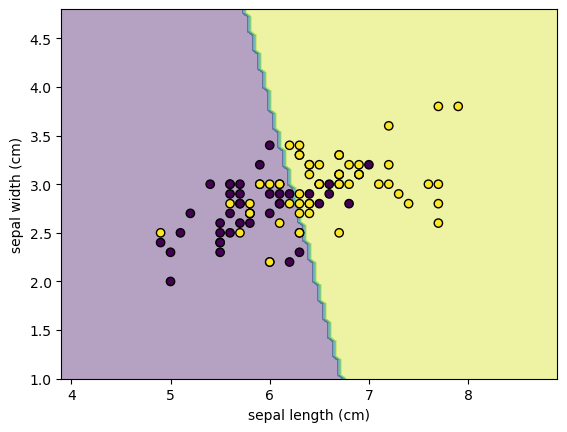

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load iris dataset and extract features and labels for the first two classes
iris = load_iris()
X = iris.data[50:,:2]
y = iris.target[50:]

# Fit logistic regression model
clf = LogisticRegression(solver='lbfgs')
clf.fit(X, y)

# Create grid of points spanning the feature space
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()


In [21]:
def save_weights(model, filename):
    np.savez(filename, theta=model.theta)

def load_weights(filename):
    with np.load(filename) as data:
        theta = data['theta']
    return theta


In [40]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import pickle


In [41]:
class ScratchLogisticRegression():
    def __init__(self, alpha=0.01, lambda_=1.0, n_iter=1000):
        self.alpha = alpha
        self.lambda_ = lambda_
        self.n_iter = n_iter
        self.loss = []
        self.val_loss = []
        self.theta = None
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def _objective(self, X, y):
        h = self._sigmoid(X.dot(self.theta))
        return (-y * np.log(h) - (1-y) * np.log(1-h)).mean() + (self.lambda_ / (2*X.shape[0])) * np.sum(self.theta[1:]**2)
    
    def _gradient_descent(self, X, y):
        m = X.shape[0]
        h = self._sigmoid(X.dot(self.theta))
        grad = 1/m * X.T.dot(h-y) + (self.lambda_/m) * np.r_[[[0]], self.theta[1:].reshape(-1,1)]
        self.theta -= self.alpha * grad.reshape(-1, 1)
    
    def fit(self, X, y, X_val=None, y_val=None):
        self.theta = np.random.randn(X.shape[1], 1)
        for i in range(self.n_iter):
            self._gradient_descent(X, y)
            self.loss.append(self._objective(X, y))
            if X_val is not None and y_val is not None:
                self.val_loss.append(self._objective(X_val, y_val))
                
    def predict(self, X):
        h = self._sigmoid(X.dot(self.theta))
        return (h >= 0.5).astype(int)
    
    def predict_proba(self, X):
        h = self._sigmoid(X.dot(self.theta))
        return np.hstack([1-h, h])
